## Part 1: The Ideal Case

In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.integrate import solve_ivp 

In [3]:
G = 6.6743*10**-11 # gravitational constant [m^3/kg/s^2]
g0 = 9.81 # gravitational acceleration [m/s^2]
Me = 5.972*10**24 # mass of the earth [kg] 
Mm = 7.35*10**22 # mass of the moon [kg] 
Re = 6378.1e3 # radius of the earth [m] 
Rm = 1738.1e3 # radius of the moon [m] 
w = 7.272*10**-5 # earth's rotation rate at the equator [rad/s] 

### 1. 

In [12]:
# x=v0*t+0.5*a*t**2
depth = 4*10**3 
a = g0 
t = np.sqrt(depth/(0.5*a)) 
print(f'It would take {t} seconds for a test mass to reach the bottom of the 4km shaft, using a simple calculation assuming no drag.') 

It would take 28.55686245854129 seconds for a test mass to reach the bottom of the 4km shaft, using a simple calculation assuming no drag.


### 2. 

In [6]:
def Eq1(g, b): 
    alph = 0 
    gam = 2
    g = g0
    y, v = b

    dydt = v 
    dvdt = -g+alph*v**gam
    return [dydt, dvdt]

### 3. 

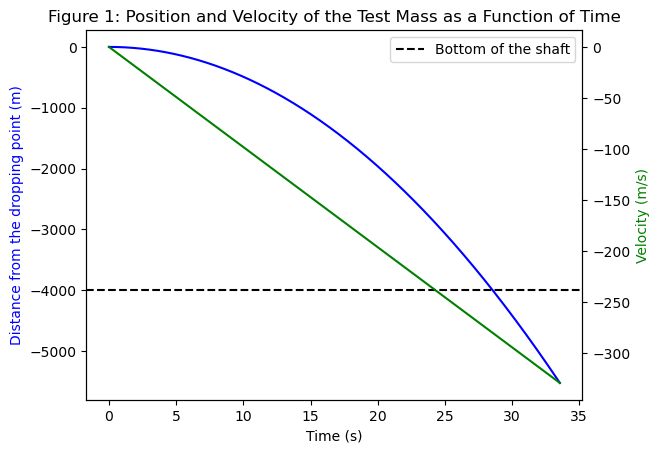

In [16]:
t0, tf = 0, t+5
t_eval = np.linspace(t0, tf, 1000) 

y0 = 0
v0 = 0
ic = [y0, v0] 

sol = solve_ivp(fun=Eq1, t_span=(t0, tf), y0=ic, t_eval=t_eval) 

pos = sol.y[0] 
vel = sol.y[1] 
t_vals = sol.t 

fig, ax = plt.subplots() 
ax.plot(t_vals, pos, color='blue') 
ax1 = ax.twinx() 
ax1.plot(t_vals, vel, label='Velocity', color='green') 
ax.axhline(y=-4000, color='black', ls='--', label='Bottom of the shaft')
ax.legend() 
ax.set_title("Figure 1: Position and Velocity of the Test Mass as a Function of Time")
ax.set_xlabel("Time (s)") 
ax.set_ylabel("Distance from the dropping point (m)", color='blue') 
ax1.set_ylabel("Velocity (m/s)", color='green'); 

Figure 1: This graph shows the plots of the distance, or position, between the test mass and its dropping point, and the velocity of the test mass as it falls down the shaft with no outside forces. The blue line represents the position as the mass accelerates, while the green line represents the velocity decreasing in a linear fashion. The dashed black line represents the bottom of the shaft at -4000 meters from the dropping point.

### 4. 

In [15]:
bottom = -4000
def stop(t, s): 
    y, v = s 
    return y-bottom 

stop.terminal = True 
sol1 = solve_ivp(fun=Eq1, t_span=(t0, tf), y0=ic, t_eval=t_eval, events=stop)

event = sol1.t_events[0][0] 

print(f'Using the events detection capability of solve_ivp, we find that it would take the test mass {event} seconds to reach the bottom of the shaft.' ) 

Using the events detection capability of solve_ivp, we find that it would take the test mass 28.55686245854132 seconds to reach the bottom of the shaft.
